# Trabajo en clase 02: t-student y aceleración de la gravedad

## Yennifer Angarita Arenas
## Alejandro Mesa Gómez

A partir de las 30 medidas del tiempo que demora caer un objeto de una altura (medida con su respectiva incertidumbre) hacer lo siguiente:

   1. Con 5 medidas determinar el tiempo y su error estándar. Para sigma, tres sigma y t-student (alfa=1%).
   2. Hacer el análogo a 5 experimentos de 5 medidas cada uno. Determinar el promedio de cada experimento. A los 5 datos de los promedios, suponiendo una distribución normal determinar el promedio y el error estándar para 3sigma.
   3. Con las 30 medidas determinar el tiempo y su error estándar. Reportar con 3sigma.
   4. Determinar usando propagación de errores (recuerde que la medida de la altura tiene error) la aceleración de la gravedad. Reporte tres valores correspondientes al tiempo con 5 medidas(t-stduent), con 5 experimentos (3sgima), y con 30 medidas (3sgima).

In [18]:
# Librerías

import matplotlib
from scipy import misc
from scipy import stats
from scipy import special
import pylab as plt
import numpy as np

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [26]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

# Primer Punto

Leemos primero los datos de los tiempos medidos en el laboratorio guardados en el archivo 'data.csv'

In [95]:
tiempos=np.loadtxt('data.csv')

#conversion de milisegundos a segundos 
tiempos/=100

#print ('tiempos[s]: ',tiempos, '\n')

El promedio de la medida experimental de tiempo de caida es de 0.408 s
La desviación estándar es 0.072 
1 sigma es 0.047 
3 sigma es 0.140 
Error t-student es 0.215 
valor t = 4.604 
_________________________________________________ 
(1 sigma): El tiempo de caida se encuentra en el intervalo (0.361,0.455) s
(3 sigma): El tiempo de caida se encuentra en el intervalo (0.268,0.548) s
(t-student): El tiempo de caida se encuentra en el intervalo (0.193,0.623) s


(0, 4)

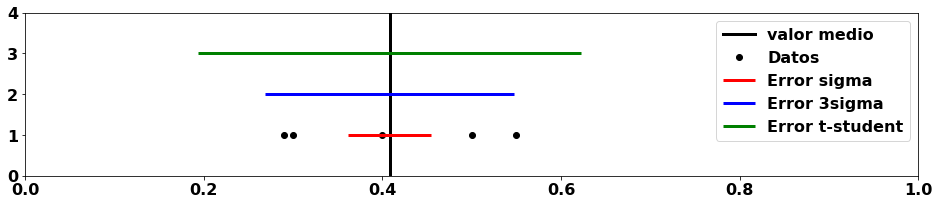

In [119]:
incerteza=0.01 #1%
datos1=np.array(tiempos[0:5])   # tiempo en segundos
n=5 #numero de datos


#for i in range(len(datos1)):
 #   print ('Datos: %.3f' %datos1[i] )

media = np.mean(datos1) # Valor medio del tiempo, comando directo de python
devstd = np.std(datos1) # Desviacion estandar, comando directo de python

ErrorSTD = devstd / np.sqrt(datos1.size) # Error de la Desviacion estandar
ErrorSTD3 = 3*(devstd / np.sqrt(datos1.size)) # 3 veces el error de la Desviacion estandar

gdl = n - 1
confi = 1. - incerteza
aux = stats.t.interval(confi,gdl,loc=0,scale=1) # loc sirve para desplazar la distribución, scale para escalarla.
valor_t = aux[1] # corrección de t-student

Errort_student=valor_t*(devstd / np.sqrt(datos1.size)) #Error estandar t-student

print('El promedio de la medida experimental de tiempo de caida es de %.3f s' % media)
print('La desviación estándar es %.3f ' %devstdt)
print('1 sigma es %.3f ' %ErrorSTD)
print('3 sigma es %.3f ' %ErrorSTD3)
print('Error t-student es %.3f ' %Errort_student)
print('valor t = %.3f ' %valor_t)
print('_________________________________________________ ')
print('(1 sigma): El tiempo de caida se encuentra en el intervalo (%.3f,%.3f) s' %(media-ErrorSTD,media+ErrorSTD))
print('(3 sigma): El tiempo de caida se encuentra en el intervalo (%.3f,%.3f) s' %(media-ErrorSTD3,media+ErrorSTD3))
print('(t-student): El tiempo de caida se encuentra en el intervalo (%.3f,%.3f) s' %(media-Errort_student,media+Errort_student))

# Graficación de los resultados
numdatos = datos1.size
l1 = np.ones(numdatos) # para graficar los datos de cada muestra en una línea

plt.figure(figsize=(16,3))
plt.axvline(media,linewidth=3, c="black",label='valor medio')
plt.plot(datos1,l1,linewidth=0,marker='.',ms=12,c='black',label='Datos')
plt.plot([media-ErrorSTD, media+ErrorSTD], [1, 1], linewidth=3, linestyle="-", color="red",solid_capstyle="butt",label='Error sigma')
plt.plot([media-ErrorSTD3, media+ErrorSTD3], [2, 2], linewidth=3, linestyle="-", color="blue",solid_capstyle="butt",label='Error 3sigma')
plt.plot([media-Errort_student, media+Errort_student], [3, 3], linewidth=3, linestyle="-", color="green",solid_capstyle="butt",label='Error t-student')
plt.legend()
plt.xlim(0,1) 
plt.ylim(0,4)

   # Análisis

Para el caso en el que se usa un experimento con 5 datos, todos los errores cruzan el valor medio aproximadamente por el centro. Pero para 1 sigma, el error abarca sólo un dato; el error con 3 sigma abarca la mayoría de los datos y el error con t-student abarca la totalidad de los datos. El intervalo de cada uno encierra el valor medio esperado, pero en este caso con t-student y 3sigma se obtiene el mejor margen de error del experimento.

# Segundo Punto

Promedio del tiempo de caida para el experimento 1 : 0.408 s
Promedio del tiempo de caida para el experimento 2 : 0.450 s
Promedio del tiempo de caida para el experimento 3 : 0.486 s
Promedio del tiempo de caida para el experimento 4 : 0.430 s
Promedio del tiempo de caida para el experimento 5 : 0.488 s

Promedio de los promedios de cada experimento: 0.452 s
Desviacion estandar: 0.031 
1 sigma: 0.014
3 sigma: 0.042
________________________________________________________________________ 
(1 sigma): El tiempo de caida se encuentra en el intervalo (0.438,0.466) s
(3 sigma): El tiempo de caida se encuentra en el intervalo (0.411,0.494) s


(0, 4)

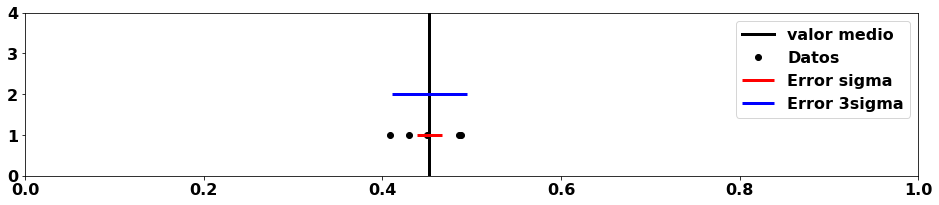

In [113]:
#Datos de los experimentos
datos1=np.array(tiempos[0:5])   # tiempo experimento 1
datos2=np.array(tiempos[6:11])   # tiempo experimento 2
datos3=np.array(tiempos[12:17])   # tiempo experimento 3
datos4=np.array(tiempos[18:23])   # tiempo experimento 4
datos5=np.array(tiempos[24:29])   # tiempo experimento 5

#Promedios de cada experimento
mediat1 = np.mean(datos1) # Valor medio del tiempo, experimento 1
mediat2 = np.mean(datos2) # Valor medio del tiempo, experimento 2
mediat3 = np.mean(datos3) # Valor medio del tiempo, experimento 3
mediat4 = np.mean(datos4) # Valor medio del tiempo, experimento 4
mediat5 = np.mean(datos5) # Valor medio del tiempo, experimento 5

medias = np.array([mediat1,mediat2,mediat3,mediat4,mediat5])

prom =np.mean(medias)
STDV = np.std(medias) #Desviacion estandar del promedio total


ErrorSTDV = STDV / np.sqrt(medias.size) # Error de la Desviacion estandar
ErrorSTDV3 = 3*(STDV / np.sqrt(medias.size)) # 3 veces el error de la Desviacion estandar

for i in range(len(medias)):
    print ('Promedio del tiempo de caida para el experimento %d : %.3f s' %(i+1,medias[i]))
    
print ('\nPromedio de los promedios de cada experimento: %.3f s' %prom)
print ('Desviacion estandar: %.3f ' %STDV)
print ('1 sigma: %.3f' %ErrorSTDV)
print ('3 sigma: %.3f' %ErrorSTDV3)
print('________________________________________________________________________ ')
print('(1 sigma): El tiempo de caida se encuentra en el intervalo (%.3f,%.3f) s' %(prom-ErrorSTDV,prom+ErrorSTDV))
print('(3 sigma): El tiempo de caida se encuentra en el intervalo (%.3f,%.3f) s' %(prom-ErrorSTDV3,prom+ErrorSTDV3))

# Graficación de los resultados
numdatos = medias.size
l1 = np.ones(numdatos) # para graficar los datos de cada muestra en una línea

plt.figure(figsize=(16,3))
plt.axvline(prom,linewidth=3, c="black",label='valor medio')
plt.plot(medias,l1,linewidth=0,marker='.',ms=12,c='black',label='Datos')
plt.plot([prom-ErrorSTDV, prom+ErrorSTDV], [1, 1], linewidth=3, linestyle="-", color="red",solid_capstyle="butt",label='Error sigma')
plt.plot([prom-ErrorSTDV3, prom+ErrorSTDV3], [2, 2], linewidth=3, linestyle="-", color="blue",solid_capstyle="butt",label='Error 3sigma')
plt.legend()
plt.xlim(0,1) 
plt.ylim(0,4)

# Análisis

En el caso en el que se realizan 5 experimentos con 5 datos cada uno es importante notar que los promedio (datos de la figura) de cada experimento están mucho más cerca del valor medio calculado en comparación con los datos del caso en el que se hizo sólo un experimento con 5 datos. 

El promedio de las medias de cada experimento tiene un error de desviación estándar bastante pequeño a 1 sigma, lo cual hace que el rango datos del experimento abarque sólo un dato, esto aumenta la posibilidad de obtener un valor errado. Por otra parte, el error con 3 sigma abarca casi todos los datos, mejorando la posibilidad de obtener un valor más preciso y exacto.

# Tercer Punto

El promedio de tiempo de caida es de 0.451 s
La desviación estándar del tiempo es 0.072 
El error estándar del tiempo es 0.013 
El error con 3sigma del tiempo es 0.039 
________________________________________________________________________ 
(1 sigma): El tiempo de caida se encuentra en el intervalo (0.438,0.464) s
(3 sigma): El tiempo de caida se encuentra en el intervalo (0.411,0.490) s


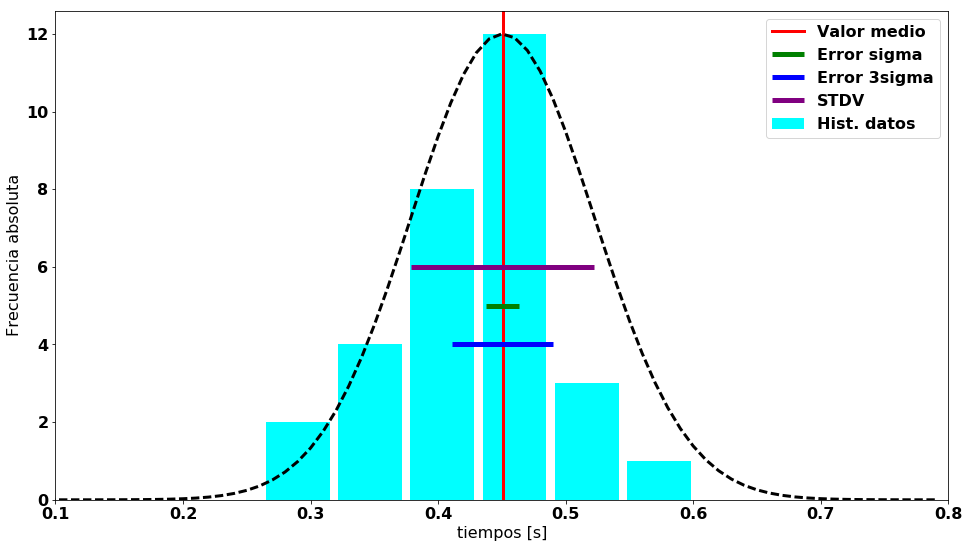

In [118]:
mediat = np.mean(tiempos) # Valor medio del tiempo, Comando directo de python
devstdt = np.std(tiempos) # Desviacion estandar del tiempo, Comando directo de python
#clasest = int(np.sqrt(tiempos.size))
clasest=6

errorstdt=devstdt/np.sqrt(tiempos.size)
sigma3=3.*errorstdt

histt, binst = np.histogram(tiempos,bins=clasest)

print('El promedio de tiempo de caida es de %.3f s' % mediat)
print('La desviación estándar del tiempo es %.3f ' %devstdt)
print('El error estándar del tiempo es %.3f ' %errorstdt)
print('El error con 3sigma del tiempo es %.3f ' %sigma3)
print('________________________________________________________________________ ')
print('(1 sigma): El tiempo de caida se encuentra en el intervalo (%.3f,%.3f) s' %(mediat-errorstdt,mediat+errorstdt))
print('(3 sigma): El tiempo de caida se encuentra en el intervalo (%.3f,%.3f) s' %(mediat-sigma3,mediat+sigma3))
#print (histt)
#print (binst)

# Medidas de longitud
plt.figure(figsize=(16,9))
plt.bar(binst[0:6],histt,width=0.05,color='cyan', label='Hist. datos')
plt.axvline(mediat,linewidth=3, c="red", label='Valor medio')
plt.plot([mediat-errorstdt,mediat+errorstdt], [5, 5], linewidth=5, linestyle="-", color="green",
         solid_capstyle="butt", label='Error sigma')
plt.plot([mediat-sigma3, mediat+sigma3], [4, 4], linewidth=5, linestyle="-", color="blue",
         solid_capstyle="butt", label='Error 3sigma')
plt.plot([mediat-devstdt, mediat+devstdt], [6, 6], linewidth=5, linestyle="-", color="purple",
         solid_capstyle="butt", label='STDV')
plt.legend()

t=np.arange(0,0.8,0.01)
ft =12.*np.exp(-(t-mediat)**2/(2*devstdt**2))
plt.plot(t, ft, 'k--', linewidth=3)
plt.xlabel('tiempos [s]')
plt.ylabel('Frecuencia absoluta')
plt.xlim(0.1,0.8) 
#plt.ylim(0,4)

plt.show()


# Análisis

Cuando realizamos los cálculos en un experimento con 30 datos es posible notar que la distrubución de dichos datos se comporta de manera gaussiana. El valor de corrección de la gaussiana se cambio por el valor más alto de las frecuencias, debido a que el valor teórico de corrección no superaba la mitad de la altura en la campana de la gráfica, sin embargo, aún así el comportamiento gaussiano era evidente.

El error a 1 sigma del promedio de los 30 datos es mucho menor que la desviación estándar de la distrubución, implicando que pueda existir una mayor exactitud pero una baja precisión por la alta disperción de datos. Mientas que el error a 3 sigma abarca mayor cantidad de datos, similar a los experimentos anteriores.

# Cuarto Punto

Para calcular la gravedad se usó la siguiente ecuación:

$$g =\frac{2h}{t^2} $$

Donde h es la altura medida con el flexómetro cuya apreciación es de ~0.001 m.

In [131]:
h = 2 #medida de altura en metros
herr = 0.001 #error medida altura en metros
gt = 9.77 #gravedad teorica en Medellin

#Calculo de la GRAVEDAD con 5 medidas(t-student)

g1=2*(h)/(media)**2

print ('g1 = %.3f' %g1)

#Calculo de la GRAVEDAD con 5 experimentos (3sgima)

g2=2*(h)/(prom)**2

print ('g2 = %.3f' %g2)

#Calculo de la GRAVEDAD con 30 medidas (3sgima).

g3=2*(h)/(mediat)**2

print ('g3 = %.3f' %g3)


g1 = 24.029
g2 = 19.544
g3 = 19.695


El procedimiento del cálculo de la propagación de errores se hizo en el cuaderno de protocolo a partir de la siguiente fórmula:

$$\delta g = \frac{2h}{t^2}\big(\frac{\delta (2h)}{2h} + \frac{\delta (t^2)}{t^2}\big)$$

Donde

$$ \delta (2h) = 2\delta h$$

$$\delta (t^2) = 2t\delta t  $$

Gravedad con 5 medidas(t-student) = (24.029 +/- 25.330) m/s2
Gravedad con 5 experimentos (3sgima) = (19.544 +/- 3.650) m/s2
Gravedad con 30 medidas (3sgima) = (19.695 +/- 3.390) m/s2


(0, 4)

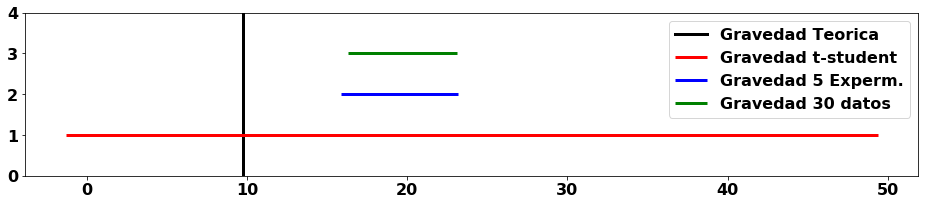

In [132]:
#Resultados de calculo de propagacion de errores

deltag1 = 25.33 #m/s^2
deltag2 = 3.65 #m/s^2
deltag3 = 3.39 #m/s^2

print ('Gravedad con 5 medidas(t-student) = (%0.3f +/- %0.3f) m/s2'%(g1,deltag1))
print ('Gravedad con 5 experimentos (3sgima) = (%0.3f +/- %0.3f) m/s2'%(g2,deltag2))
print ('Gravedad con 30 medidas (3sgima) = (%0.3f +/- %0.3f) m/s2'%(g3,deltag3))

# Graficación de los resultados
numdatos = datos1.size
l1 = np.ones(numdatos) # para graficar los datos de cada muestra en una línea

plt.figure(figsize=(16,3))
plt.axvline(gt,linewidth=3, c="black",label='Gravedad Teorica')
plt.plot([g1-deltag1, g1+deltag1], [1, 1], linewidth=3, linestyle="-", color="red",solid_capstyle="butt",label='Gravedad t-student')
plt.plot([g2-deltag2, g2+deltag2], [2, 2], linewidth=3, linestyle="-", color="blue",solid_capstyle="butt",label='Gravedad 5 Experm.')
plt.plot([g3-deltag3, g3+deltag3], [3, 3], linewidth=3, linestyle="-", color="green",solid_capstyle="butt",label='Gravedad 30 datos')
plt.legend()
#plt.xlim(0,1) 
plt.ylim(0,4)

# Análisis

A pesar de que en ninguno de los 3 cálculos se obtuvo el valor teórico de la gravedad, el cálculo del error con t-student logró arrojar un rango de valores (línea roja) que incluye el teórico. El resultado de 'g' usando sólo 5 datos en 1 experimento es el más alejado de la realidad, esto demuestra que la probabilidad de obtener un dato más aproximado al teórico aumenta en la medida en que aumente la cantidad de datos y, aún mejor, el número de experimentos 